In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [34]:
import os

In [35]:
os.chdir(r"C:\Users\riama\Desktop\Machine_learning")

In [36]:
covid=pd.read_csv("Covid_Data.csv")

In [37]:
covid.shape

(1048575, 21)

In [38]:
df=covid[covid["INTUBED"].isin([1,2])]

In [39]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [40]:
#df=covid.sample(20000, random_state=0)  #1048575*.3

In [41]:
df.shape

(192706, 21)

In [42]:
df["CLASIFFICATION_FINAL"].value_counts()

3    105932
7     60496
6     16844
5      4995
1      2182
2      1665
4       592
Name: CLASIFFICATION_FINAL, dtype: int64

In [43]:
df["Covid"]=np.where(df["CLASIFFICATION_FINAL"].isin([1,2,3]),1,0)

C:\Users\riama\AppData\Local\Temp\ipykernel_8632\3356703027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Covid"]=np.where(df["CLASIFFICATION_FINAL"].isin([1,2,3]),1,0)


In [44]:
df["Covid"].value_counts(normalize=True)

1    0.569671
0    0.430329
Name: Covid, dtype: float64

In [45]:
df.drop(columns=["CLASIFFICATION_FINAL"],inplace=True)

C:\Users\riama\AppData\Local\Temp\ipykernel_8632\2330101161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["CLASIFFICATION_FINAL"],inplace=True)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192706 entries, 2 to 1048571
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   USMER           192706 non-null  int64 
 1   MEDICAL_UNIT    192706 non-null  int64 
 2   SEX             192706 non-null  int64 
 3   PATIENT_TYPE    192706 non-null  int64 
 4   DATE_DIED       192706 non-null  object
 5   INTUBED         192706 non-null  int64 
 6   PNEUMONIA       192706 non-null  int64 
 7   AGE             192706 non-null  int64 
 8   PREGNANT        192706 non-null  int64 
 9   DIABETES        192706 non-null  int64 
 10  COPD            192706 non-null  int64 
 11  ASTHMA          192706 non-null  int64 
 12  INMSUPR         192706 non-null  int64 
 13  HIPERTENSION    192706 non-null  int64 
 14  OTHER_DISEASE   192706 non-null  int64 
 15  CARDIOVASCULAR  192706 non-null  int64 
 16  OBESITY         192706 non-null  int64 
 17  RENAL_CHRONIC   192706 non-n

In [47]:
df.drop(columns=["DATE_DIED"],inplace=True) #10:30 ke karib vedio dekho

C:\Users\riama\AppData\Local\Temp\ipykernel_8632\2676891469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=["DATE_DIED"],inplace=True) #10:30 ke karib vedio dekho


In [48]:
def univar(data,y):
    unique_count= data[y].nunique()
    missing= data[y].isnull().sum()
    unique_cat= list(data[y].unique())
    f1=pd.DataFrame(data[y].value_counts(dropna=False))
    f1.rename(columns={y:"Count"},inplace=True)
    f2=pd.DataFrame(data[y].value_counts(normalize=True))
    f2.rename(columns={y:"percentage"},inplace=True)
    f2["percentage"]=round(f2["percentage"]*100,2)  #(f2["percentage"]*100).round(2).astype(str)+"%" (if we want to add percentage
                                                    #then we have to convert it to string then will add %symbol)
    ff=pd.concat([f1,f2],axis=1)
    
    myvalue= {"missing":missing,"unique category": unique_cat,"unique_count":unique_count}
    print(f"value count and %\n",ff)
    sns.countplot(data=data,x=y)
    return myvalue

In [49]:
def univar_num(y):
    missing= y.isnull().sum()
    min1=round(y.min(),2)
    max1=round(y.max(),2)
    mean=round(y.mean(),2)
    var=round(y.var(),2)
    std=round(y.std(),2)
    range1=round(max1-min1,2)
    q1= round(y.quantile(.25),2)
    q2=round(y.quantile(.5),2)
    q3=round(y.quantile(.75),2)
    skew=round(y.skew(),2)
    kurt=round(y.kurt(),2)
    myval={"Missing Value":missing,"Minimum value": min1,"Maximum value": max1, "Mean value": mean,"Variance": var,"Standard Deviation": std,"Range": range1,
          "Quantile1":q1,"Quantile2": q2,"Quantile3":q3,"Skewness": skew,"kurtosis":kurt}
    sns.histplot(y)
    plt.show()
    sns.boxplot(data=df,y=y)
    plt.show()
    return myval

value count and %
     Count  percentage
1  105312       54.65
2   87394       45.35


{'missing': 0, 'unique category': [2, 1], 'unique_count': 2}

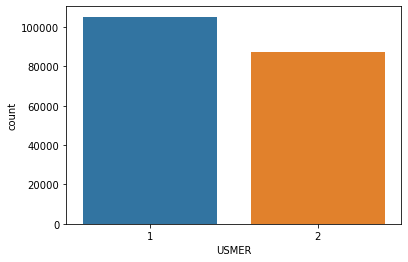

In [50]:
univar(df,"USMER")

value count and %
     Count  percentage
4   88028       45.68
12  66332       34.42
6   14762        7.66
9    8858        4.60
3    4102        2.13
10   3588        1.86
8    3412        1.77
5    1701        0.88
11   1318        0.68
7     293        0.15
13    247        0.13
2      41        0.02
1      24        0.01


{'missing': 0,
 'unique category': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 'unique_count': 13}

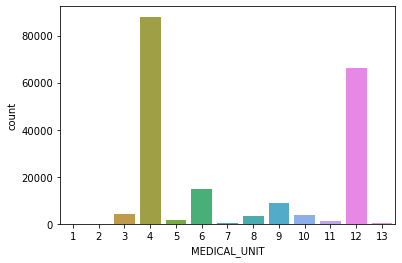

In [51]:
univar(df,"MEDICAL_UNIT")

In [52]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Covid'],
      dtype='object')

value count and %
     Count  percentage
2  159050       82.54
1   33656       17.46


{'missing': 0, 'unique category': [1, 2], 'unique_count': 2}

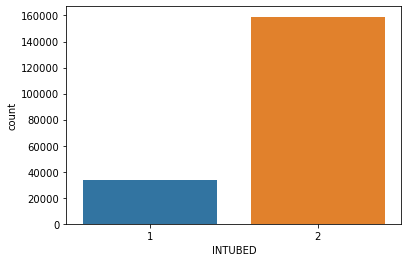

In [53]:
# 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
#        'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
#        'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
#        'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Covid'
univar(df,"INTUBED")

In [54]:
df["INTUBED"]=df["INTUBED"].replace([97,99],3)

C:\Users\riama\AppData\Local\Temp\ipykernel_8632\298574452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["INTUBED"]=df["INTUBED"].replace([97,99],3)


In [55]:
df["INTUBED"].value_counts()

2    159050
1     33656
Name: INTUBED, dtype: int64

In [56]:
#df["INTUBED_missing"]=np.where(df["INTUBED"].isin([1,2]),0,1) #1 is for missing values(3 vale), 0 is for 1 and 2

In [58]:
#df["INTUBED_missing"].value_counts()

value count and %
     Count  percentage
1  116013        60.2
2   76693        39.8


{'missing': 0, 'unique category': [2, 1], 'unique_count': 2}

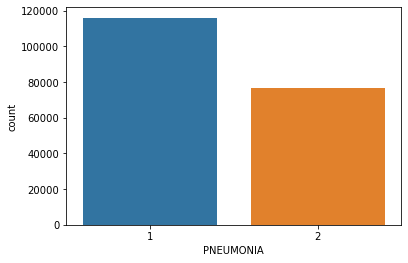

In [59]:
univar(df,"PNEUMONIA")

value count and %
     Count  percentage
2  192706       100.0


{'missing': 0, 'unique category': [2], 'unique_count': 1}

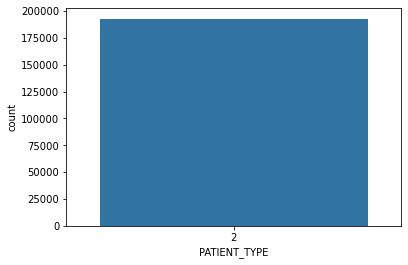

In [60]:
univar(df,"PATIENT_TYPE")

value count and %
      Count  percentage
97  114463       59.40
2    76108       39.49
1     1806        0.94
98     329        0.17


{'missing': 0, 'unique category': [97, 2, 98, 1], 'unique_count': 4}

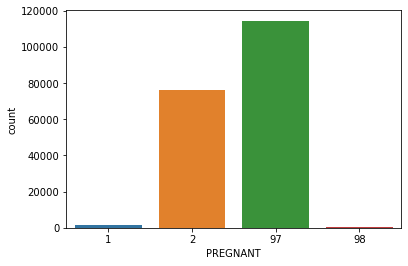

In [61]:
univar(df, "PREGNANT")

In [62]:
df.groupby(["SEX","PREGNANT"])["USMER"].count()

SEX  PREGNANT
1    1             1806
     2            76108
     98             329
2    97          114463
Name: USMER, dtype: int64

In [63]:
df["PREGNANT"]=df["PREGNANT"].replace([2,98,97],0)

C:\Users\riama\AppData\Local\Temp\ipykernel_8632\4103353465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PREGNANT"]=df["PREGNANT"].replace([2,98,97],0)


In [64]:
df["PREGNANT"].value_counts() #1 who are pregnant 0 are not pregnant

0    190900
1      1806
Name: PREGNANT, dtype: int64

value count and %
      Count  percentage
2   135258       70.19
1    56277       29.20
98    1171        0.61


{'missing': 0, 'unique category': [1, 2, 98], 'unique_count': 3}

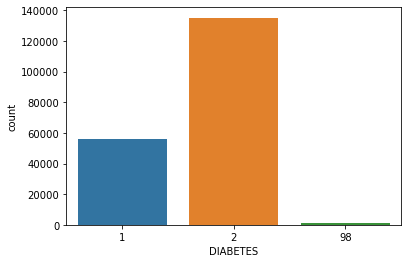

In [65]:
univar(df,"DIABETES")

In [67]:
df=df[(df["DIABETES"]==1)| (df["DIABETES"]==2)] #Removing 98 vale as they are missing

value count and %
     Count  percentage
2  135258       70.62
1   56277       29.38


{'missing': 0, 'unique category': [1, 2], 'unique_count': 2}

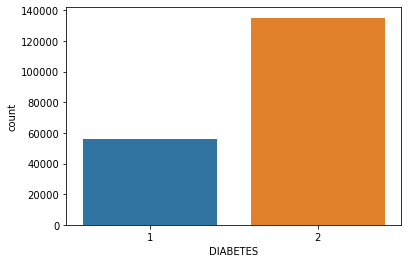

In [68]:
univar(df,"DIABETES")

value count and %
      Count  percentage
2   183239       95.67
1     8147        4.25
98     149        0.08


{'missing': 0, 'unique category': [2, 1, 98], 'unique_count': 3}

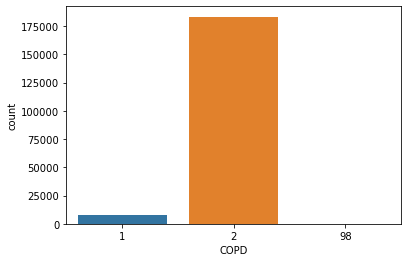

In [69]:
# 'USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
#        'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
#        'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
#        'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Covid'
univar(df,"COPD")

In [70]:
df=df[(df["COPD"]==1)| (df["COPD"]==2)]

value count and %
      Count  percentage
2   186557       97.48
1     4760        2.49
98      69        0.04


{'missing': 0, 'unique category': [2, 1, 98], 'unique_count': 3}

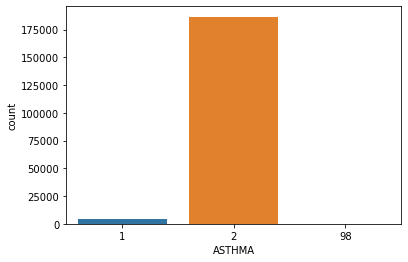

In [71]:
univar(df,"ASTHMA")

In [72]:
df=df[(df["ASTHMA"]==1)| (df["ASTHMA"]==2)]

In [75]:
#INMSUPR',
#        'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
#        'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Covid'
df=df[(df["INMSUPR"]==1)| (df["INMSUPR"]==2)]
df=df[(df["HIPERTENSION"]==1)| (df["HIPERTENSION"]==2)]
df=df[(df["OTHER_DISEASE"]==1)| (df["OTHER_DISEASE"]==2)]
df=df[(df["CARDIOVASCULAR"]==1)| (df["CARDIOVASCULAR"]==2)]
df=df[(df["OBESITY"]==1)| (df["OBESITY"]==2)]
df=df[(df["RENAL_CHRONIC"]==1)| (df["RENAL_CHRONIC"]==2)]
df=df[(df["TOBACCO"]==1)| (df["TOBACCO"]==2)]
df=df[(df["ICU"]==1)| (df["ICU"]==2)]


In [80]:
# PATIENT_TYPE', 'INTPATIENT_TYPEUBED', 'PNEUMONIA',
#        'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
#        'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
#        'RENAL_CHRONIC', 'TOBACCO', 'ICU'
df["SEX"]=df["SEX"].replace([2],0)
df["PATIENT_TYPE"]=df["PATIENT_TYPE"].replace([2],0)

df["PNEUMONIA"]=df["PNEUMONIA"].replace([2],0)
df["PREGNANT"]=df["PREGNANT"].replace([2],0)
df["DIABETES"]=df["DIABETES"].replace([2],0)
df["COPD"]=df["COPD"].replace([2],0)
df["ASTHMA"]=df["ASTHMA"].replace([2],0)
df["INMSUPR"]=df["INMSUPR"].replace([2],0)
df["HIPERTENSION"]=df["HIPERTENSION"].replace([2],0)
df["OTHER_DISEASE"]=df["OTHER_DISEASE"].replace([2],0)
df["CARDIOVASCULAR"]=df["CARDIOVASCULAR"].replace([2],0)
df["OBESITY"]=df["OBESITY"].replace([2],0)
df["RENAL_CHRONIC"]=df["RENAL_CHRONIC"].replace([2],0)
df["TOBACCO"]=df["TOBACCO"].replace([2],0)


In [78]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'Covid'],
      dtype='object')

In [89]:
y=df["Covid"]
x=df.drop(columns=["Covid"])

In [106]:
def model_dev(x,y,test_s,model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=test_s,random_state=0)
    model.fit(x_train,y_train)
    
    pred_train=model.predict(x_train)
    pred_test=model.predict(x_test)
    
    tr_acc=metrics.accuracy_score(pred_train,y_train)
    tt_acc=metrics.accuracy_score(pred_test,y_test)
    
    tr_recall= metrics.recall_score(pred_train,y_train)
    tt_recall=metrics.recall_score(pred_test,y_test)
    
    tr_precision= metrics.precision_score(pred_train,y_train)
    tt_precision= metrics.precision_score(pred_test,y_test)
    output={"Accuracy_train":tr_acc, "Accuracy_test": tt_acc,
           "Recall_train": tr_recall,"Recall_test": tt_recall,
           "Precision_train": tr_precision,"Precision_test": tt_precision}
    return output

In [107]:
log=LogisticRegression(max_iter=100000)

In [108]:
logistic_basic=model_dev(x,y,.7,log)

In [109]:
logistic_basic

{'Accuracy_train': 0.6335472527472528,
 'Accuracy_test': 0.6331050176699746,
 'Recall_train': 0.6450048256576505,
 'Recall_test': 0.6431454817075108,
 'Precision_train': 0.8004668161297257,
 'Precision_test': 0.8017487320371935}

In [110]:
pd.DataFrame.from_dict(logistic_basic,orient="index")

,0
Accuracy_train,0.633547
Accuracy_test,0.633105
Recall_train,0.645005
Recall_test,0.643145
Precision_train,0.800467
Precision_test,0.801749


In [111]:
knn=KNeighborsClassifier(n_neighbors=3)

In [112]:
#knn_basic=model_dev(x,y,.7,knn)

In [113]:
dt=DecisionTreeClassifier(max_depth=12)
dt_basic=model_dev(x,y,.7,dt)

In [114]:
dt_basic

{'Accuracy_train': 0.6683956043956044,
 'Accuracy_test': 0.6354861315188644,
 'Recall_train': 0.6567727761631234,
 'Recall_test': 0.6339090650808735,
 'Precision_train': 0.8813918491446823,
 'Precision_test': 0.8546201394759088}

In [115]:
rf= RandomForestClassifier(max_depth=12)
rf_basic= model_dev(x,y,.7,rf)

In [116]:
rf_basic

{'Accuracy_train': 0.6847648351648352,
 'Accuracy_test': 0.6459976942378551,
 'Recall_train': 0.6674295129989015,
 'Recall_test': 0.6413698090926983,
 'Precision_train': 0.8956727373237923,
 'Precision_test': 0.8608410819949281}

In [117]:
ad=AdaBoostClassifier()
ad_basic=model_dev(x,y,.7,ad)

In [118]:
ad_basic

{'Accuracy_train': 0.6450813186813187,
 'Accuracy_test': 0.6461860734980521,
 'Recall_train': 0.6432656463451342,
 'Recall_test': 0.6432392584253992,
 'Precision_train': 0.8532293234237278,
 'Precision_test': 0.8528238588334742}

In [120]:
xg=XGBClassifier(use_label_encoder=False)
xg_basic=model_dev(x,y,.7,xg)
xg_basic

{'Accuracy_train': 0.6837626373626373,
 'Accuracy_test': 0.6427801764736909,
 'Recall_train': 0.6766452551205915,
 'Recall_test': 0.6475894505219468,
 'Precision_train': 0.857313964558828,
 'Precision_test': 0.8201870245139475}

#### Hyperparameter Tuning  (The parameters which are under our control)

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.6,random_state=0)

In [124]:
param={"penalty":["l1","l2","elasticnet"],
      "C":[1,10,100]}
lg=LogisticRegression(solver="saga",max_iter=1000000)
g_lg=GridSearchCV(lg,param_grid=param,cv=5)
g_lg.fit(x_train,y_train)

C:\Users\riama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\riama\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\riama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1101, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
C:\Users\riama\anaconda3\lib\site-packages\sklearn\model

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000000, solver='saga'),
             param_grid={'C': [1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [125]:
g_lg.best_params_

{'C': 10, 'penalty': 'l2'}

In [126]:
lg=LogisticRegression(C=10, penalty="l2")

In [127]:
log_params=model_dev(x,y,.5,lg)

C:\Users\riama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [128]:
gh= pd.DataFrame(log_params.items())
gh.columns=["Metrics","Logistic"]
gh

,Metrics,Logistic
0,Accuracy_train,0.633043
1,Accuracy_test,0.633327
2,Recall_train,0.644796
3,Recall_test,0.642886
4,Precision_train,0.798529
5,Precision_test,0.802617


In [129]:
param={"max_depth":[7,9,11],
      "min_samples_split":[10,100,200]}
dt=DecisionTreeClassifier()
dt_lg=GridSearchCV(dt,param_grid=param,cv=5)
dt_lg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 9, 11],
                         'min_samples_split': [10, 100, 200]})

In [130]:
dt_lg.best_params_

{'max_depth': 11, 'min_samples_split': 200}

In [131]:
dt=DecisionTreeClassifier(max_depth=11,min_samples_split=200)
params=model_dev(x,y,.5,dt)
gh1=pd.DataFrame(params.items())
gh1.columns=["Metrics","Decision"]
gh1

,Metrics,Decision
0,Accuracy_train,0.649679
1,Accuracy_test,0.641429
2,Recall_train,0.646610
3,Recall_test,0.639835
4,Precision_train,0.854986
5,Precision_test,0.848752


In [133]:
pd.merge(gh,gh1,on="Metrics",how="inner")

,Metrics,Logistic,Decision
0,Accuracy_train,0.633043,0.649679
1,Accuracy_test,0.633327,0.641429
2,Recall_train,0.644796,0.646610
3,Recall_test,0.642886,0.639835
4,Precision_train,0.798529,0.854986
5,Precision_test,0.802617,0.848752
